# 1. Numerical Data plotting
 - relplot() #it is all in plot for numerical data plotting. we can change type by setting 'kind' parameter.

 - scatterplot()

 - lineplot()


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tip= sns.load_dataset('tips')
tip.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## Scatter Plot

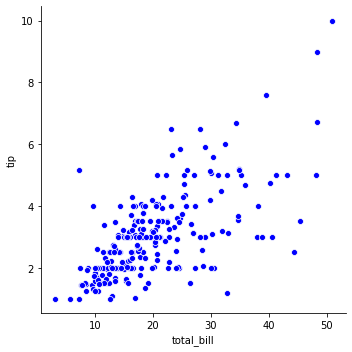

In [3]:
sns.relplot(x= 'total_bill', y= 'tip', data= tip, color= 'b')

>While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

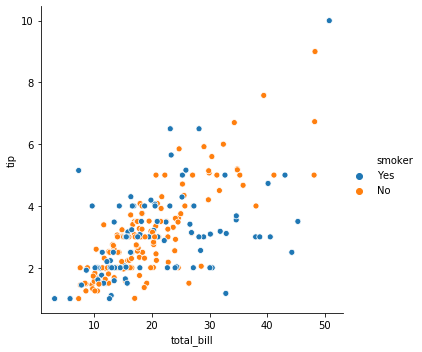

In [4]:
sns.relplot(x= 'total_bill', y= 'tip', data= tip, hue= 'smoker')

>To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

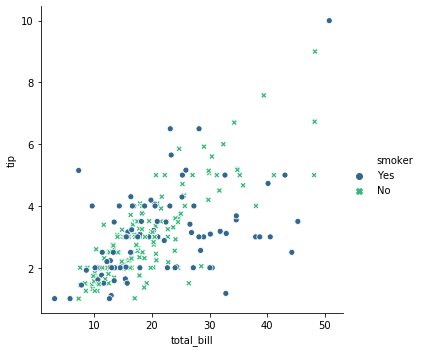

In [5]:
sns.relplot(x= 'total_bill', y= 'tip', data= tip, hue= 'smoker', style= 'smoker', palette='viridis')

>It’s also possible to represent four variables by changing the hue and style of each point independently.

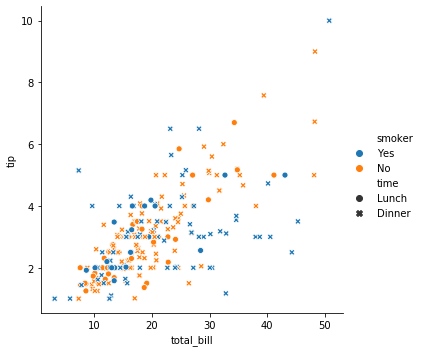

In [6]:
sns.relplot(x= 'total_bill', y= 'tip', data= tip, hue= 'smoker', style= 'time' )

>If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

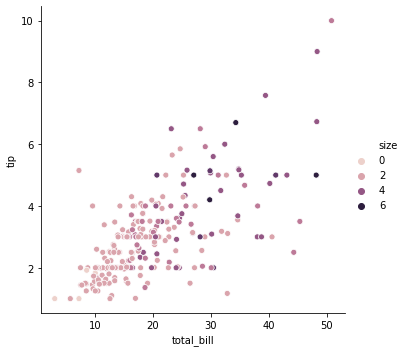

In [7]:
sns.relplot(x= 'total_bill', y= 'tip', hue= 'size', data= tip)

>The third kind of semantic variable changes the size of each point:

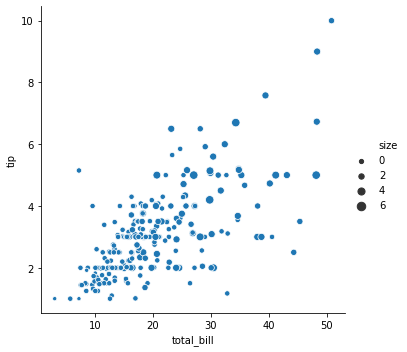

In [8]:
sns.relplot(x= 'total_bill', y= 'tip', size= 'size', data= tip)

>. This range of sizes can be customized:

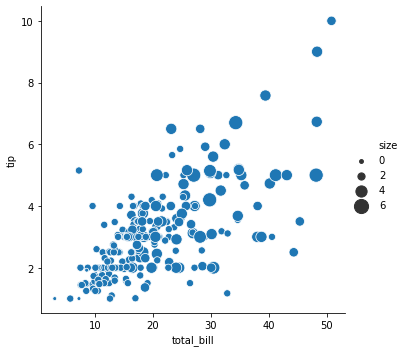

In [9]:
sns.relplot(x= 'total_bill', y= 'tip', size= 'size', sizes= (15,200), data= tip)

## Line Plots
With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

In [10]:
df= pd.DataFrame(dict(time= np.arange(500), value= np.random.randn(500).cumsum()))
df.head()

time     value
0     0 -1.458240
1     1 -2.539194
2     2 -3.620106
3     3 -5.015862
4     4 -5.877367

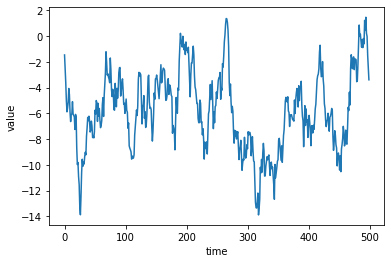

In [11]:
sns.lineplot( x= 'time', y= 'value', data= df)

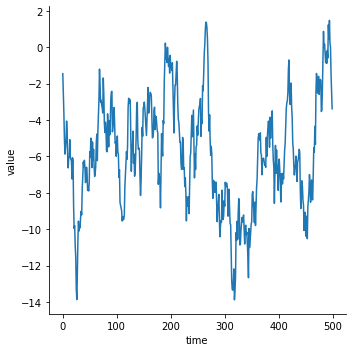

In [12]:
sns.relplot(x= 'time', y= 'value', kind= 'line', data= df)

>. Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:

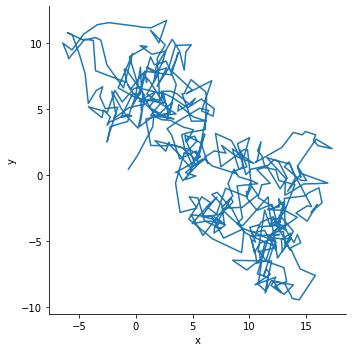

In [13]:
df1= pd.DataFrame(np.random.randn(500, 2).cumsum(axis= 0), columns= ['x', 'y'])
sns.relplot(x= 'x', y= 'y', data= df1, sort= False, kind= 'line')

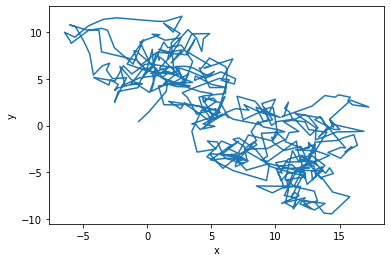

In [14]:
sns.lineplot(x= 'x', y= 'y', data= df1, sort= False)

#### Aggregation and Representing Uncertainty
More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

In [15]:
fmri= sns.load_dataset('fmri')
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

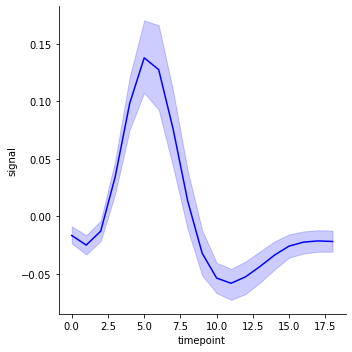

In [16]:
sns.relplot(x= 'timepoint', y= 'signal', kind= 'line', data= fmri, color= 'b')

>The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

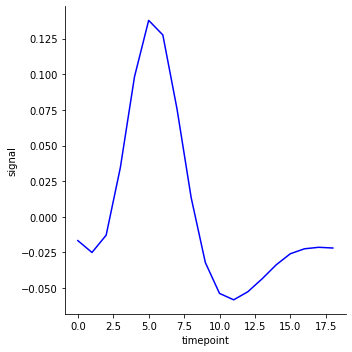

In [17]:
sns.relplot(x= 'timepoint', y= 'signal', kind= 'line', data= fmri, ci= None, color= 'b')

>Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

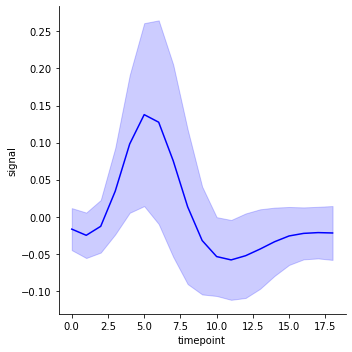

In [18]:
sns.relplot(x= 'timepoint', y= 'signal', kind= 'line', data= fmri, ci='sd', color= 'b')

>. To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

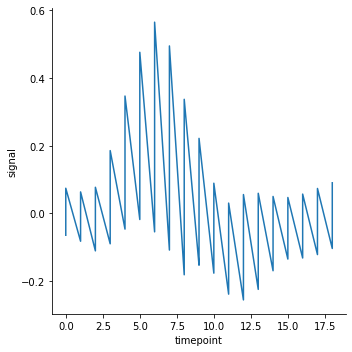

In [19]:
sns.relplot(x= 'timepoint', y= 'signal', data= fmri, kind= 'line', estimator= None)

###### Plotting Subsets of data with Semantic Mappings
The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements.

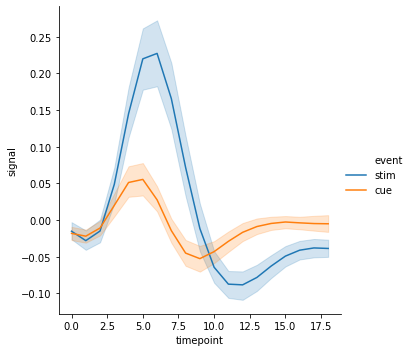

In [20]:
sns.relplot(x= 'timepoint', y= 'signal', hue= 'event', data= fmri, kind= 'line')

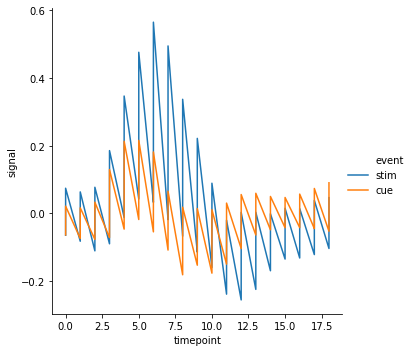

In [21]:
sns.relplot(x= 'timepoint', y= 'signal', hue= 'event', data= fmri, kind= 'line', estimator= None)

> Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

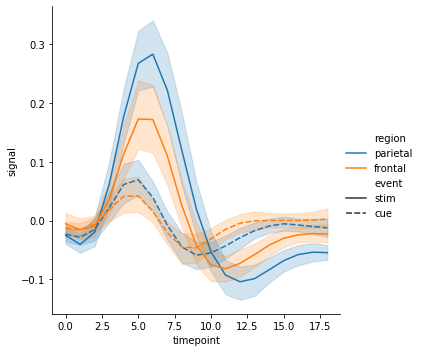

In [22]:
sns.relplot(x= 'timepoint', y= 'signal', hue= 'region', style= 'event', data= fmri, kind= 'line')

> But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

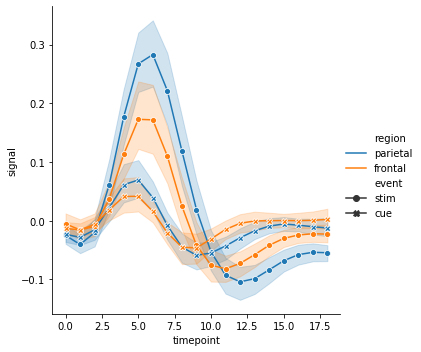

In [23]:
sns.relplot(x= 'timepoint', y= 'signal', hue= 'region', style= 'event', data= fmri, kind= 'line', markers= True, dashes= False)

> Even when you are only examining changes across one additional variable, it can be useful to alter both the color and style of the lines. This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness:

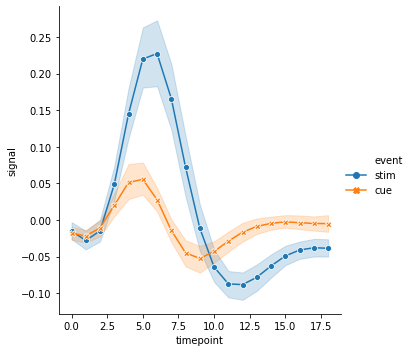

In [24]:
sns.relplot(x= 'timepoint', y= 'signal', hue= 'event', style= 'event', data= fmri, kind= 'line', markers= True, dashes= False)

> The default colormap and handling of the legend in lineplot() also depends on whether the hue semantic is categorical or numeric:

In [25]:
dots=sns.load_dataset('dots')
dots.head()

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

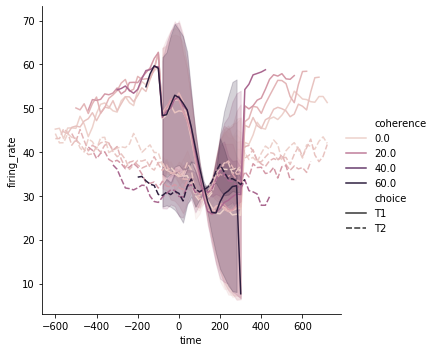

In [26]:
sns.relplot(x= 'time', y= 'firing_rate', data= dots, kind= 'line', hue= 'coherence', style= 'choice')

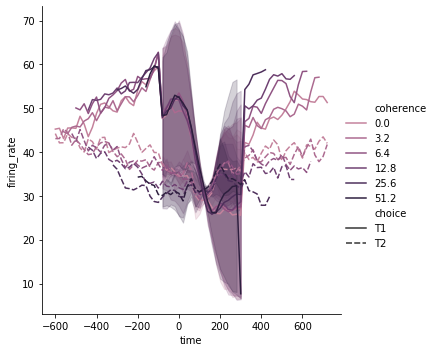

In [27]:
palette= sns.cubehelix_palette(light= 0.6, n_colors= 6)
sns.relplot(x= 'time', y= 'firing_rate', data= dots, kind= 'line', hue= 'coherence', style= 'choice', palette= palette)

###### Plotting with Date Data
Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:

C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


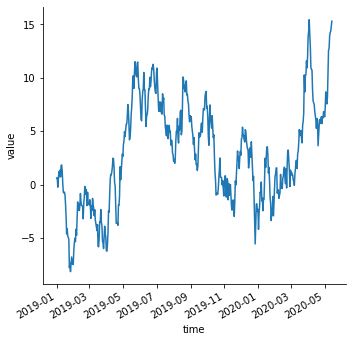

In [28]:
df2= pd.DataFrame(dict(time= pd.date_range('2019-1-1', periods= 500), value= np.random.randn(500).cumsum()))
g= sns.relplot(x= 'time', y= 'value', kind= 'line', data= df2)
g.fig.autofmt_xdate()

###### Facets
This means that you make multiple axes and plot subsets of the data on each of them:

In [29]:
tips= sns.load_dataset('tips')
tips.tail()

total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

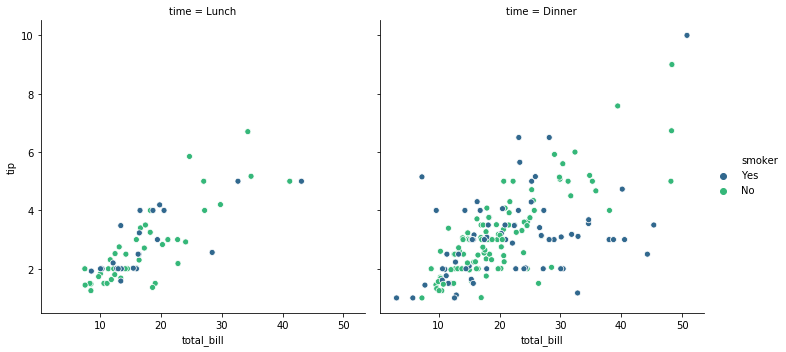

In [30]:
sns.relplot(x= 'total_bill', y= 'tip', data= tips, hue= 'smoker', col= 'time', palette= 'viridis')

> You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

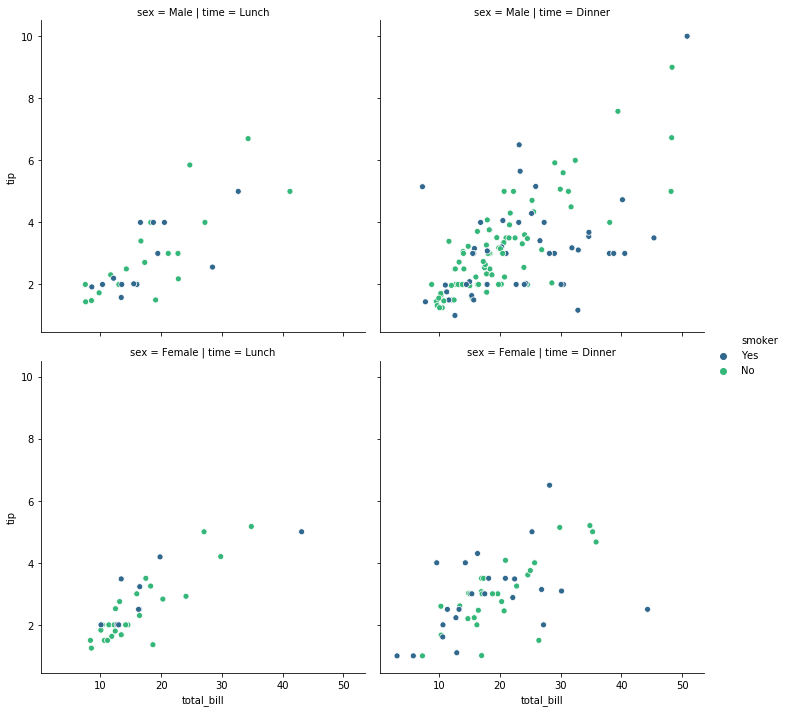

In [31]:
sns.relplot(x= 'total_bill', y= 'tip', data= tips, hue= 'smoker', row= 'sex', col= 'time', palette= 'viridis')

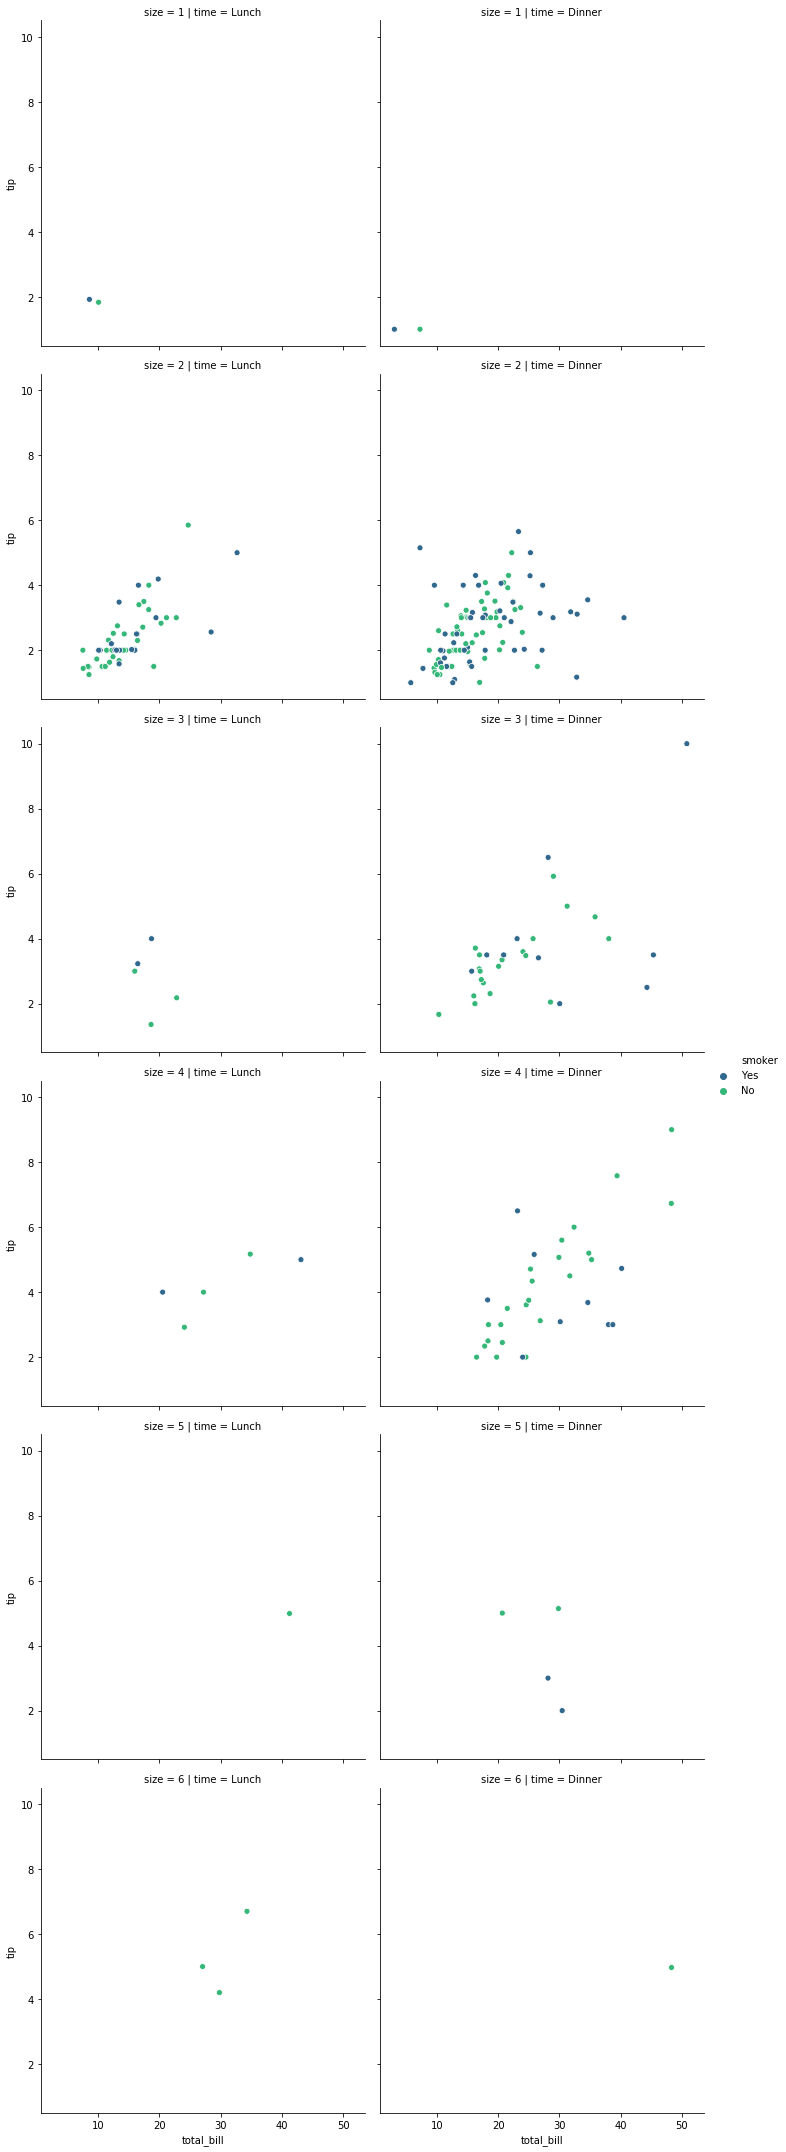

In [32]:
sns.relplot(x= 'total_bill', y= 'tip', data= tips, hue= 'smoker',row= 'size', col= 'time', palette= 'viridis')

>. You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

In [33]:
fmri.tail()

subject  timepoint event    region    signal
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

In [34]:
sns.set(style= 'darkgrid')

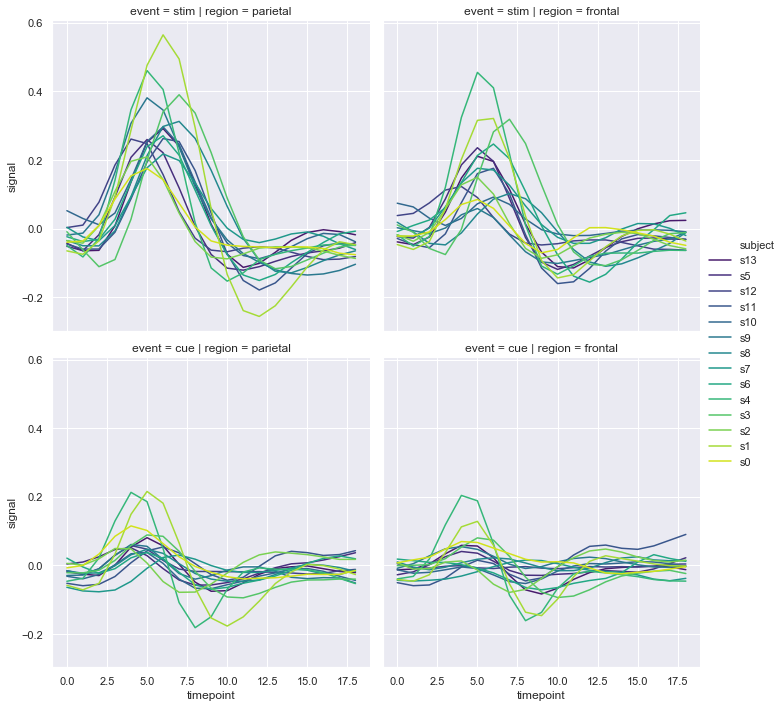

In [35]:
sns.relplot(x= 'timepoint', y= 'signal', hue= 'subject', col= 'region', row= 'event', palette= 'viridis', height= 5,
           kind= 'line', estimator= None, data= fmri)

> When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

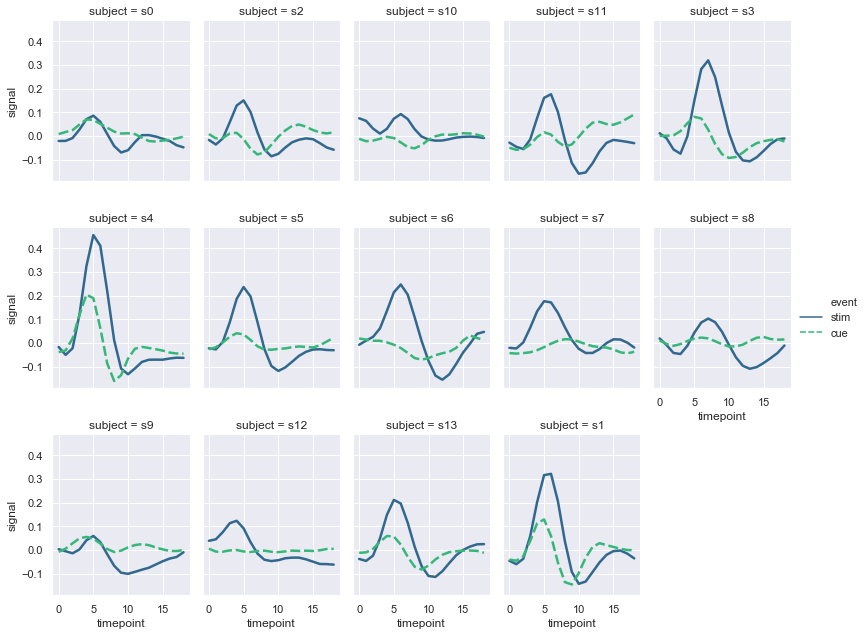

In [36]:
sns.relplot(x= 'timepoint', y= 'signal', hue= 'event', style= 'event', col= 'subject',
           col_wrap= 5, palette= 'viridis', height= 3, aspect= .75, linewidth= 2.5,
           kind= 'line', data= fmri.query(" region== 'frontal' "))

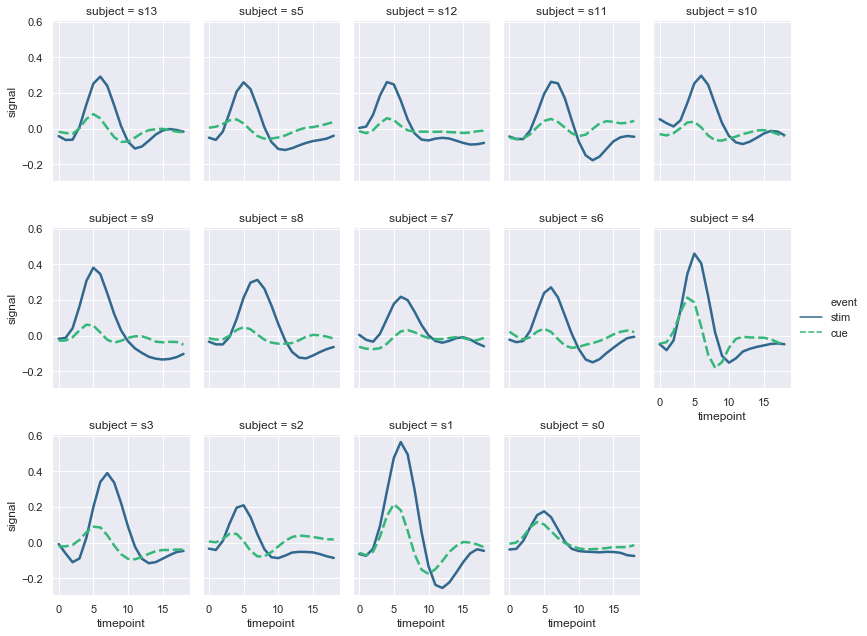

In [37]:
sns.relplot(x= 'timepoint', y= 'signal', hue= 'event', style= 'event', col= 'subject',
           col_wrap= 5, palette= 'viridis', height= 3, aspect= .75, linewidth= 2.5,
           kind= 'line', data= fmri.query(" region== 'parietal' "))

In [38]:
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [39]:
sns.set()

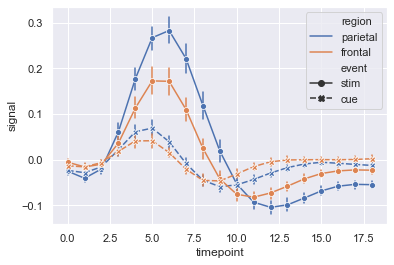

In [40]:
sns.lineplot(x= 'timepoint', y= 'signal',hue= 'region', style= 'event', data= fmri, ci= 68, markers= True, err_style= 'bars')

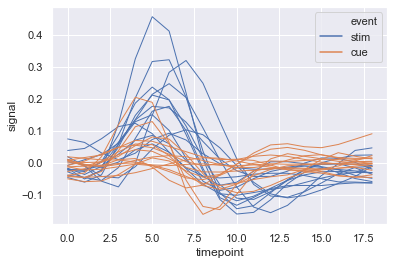

In [41]:
sns.lineplot(x= 'timepoint', y= 'signal', hue= 'event', units= 'subject', lw= 1, estimator= None, data= fmri.query("region=='frontal'"))

In [42]:
dots.head()

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

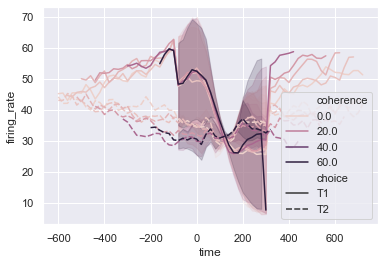

In [43]:
sns.lineplot(x= 'time', y= 'firing_rate', data= dots, hue= 'coherence', style= 'choice')

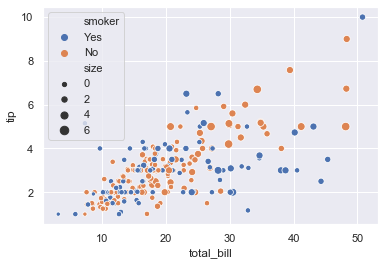

In [44]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'smoker', size= 'size', data= tips)

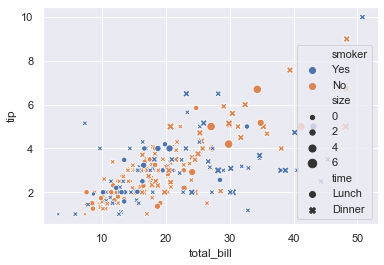

In [45]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'smoker', size= 'size', data= tips, style= 'time')

In [46]:
iris= sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

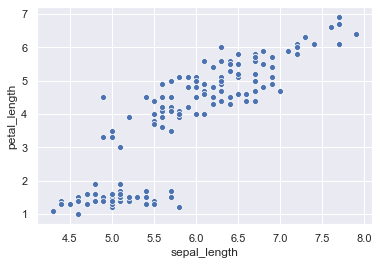

In [47]:
sns.scatterplot(x= 'sepal_length', y= 'petal_length', data= iris)

# 2. Categorical Data
  If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization. There are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

  It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

##### Categorical scatterplots:

> 1. stripplot() (with kind="strip"; the default)

> 2. swarmplot() (with kind="swarm")

##### Categorical distribution plots:
    
> 1. boxplot() (with kind="box")

> 2. violinplot() (with kind="violin")

> 3. boxenplot() (with kind="boxen")

##### Categorical estimate plots:

> 1. pointplot() (with kind="point")

> 2. barplot() (with kind="bar")

> 3. countplot() (with kind="count")

In [48]:
sns.set( style= 'ticks', color_codes= True)

### Categorical Scatterplot
> The default representation of the data in catplot() uses a scatterplot

In [49]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

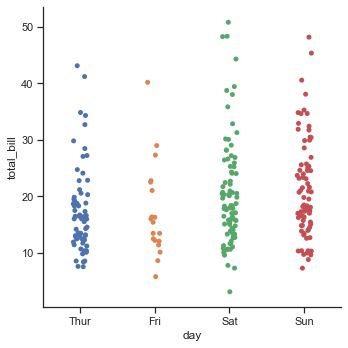

In [50]:
sns.catplot(x= 'day', y= 'total_bill', data= tips, jitter= True)

> The jitter parameter controls the magnitude of jitter or disables it altogether:

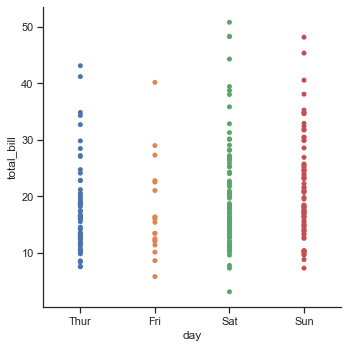

In [51]:
sns.catplot(x= 'day', y= 'total_bill', data= tips, jitter= False)

> .The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by swarmplot(), which is activated by setting kind="swarm" in catplot():

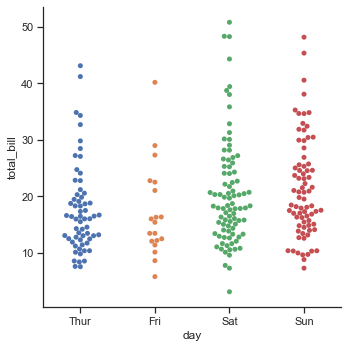

In [52]:
sns.catplot(x= 'day', y= 'total_bill', data= tips, kind= 'swarm')

> Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. (The categorical plots do not currently support size or style semantics). Each different categorical plotting function handles the hue semantic differently. For the scatter plots, it is only necessary to change the color of the points:

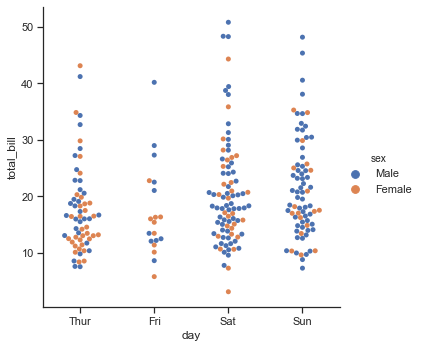

In [53]:
sns.catplot(x= 'day', y= 'total_bill', kind= 'swarm', hue= 'sex', data= tips)

> Showing multiple relationships with facets
Just like relplot(), the fact that catplot() is built on a FacetGrid means that it is easy to add faceting variables to visualize higher-dimensional relationships:

In [186]:
sns.catplot(x="day", y="total_bill", hue="smoker",
             aspect=.6,
            kind="swarm", data=tips);

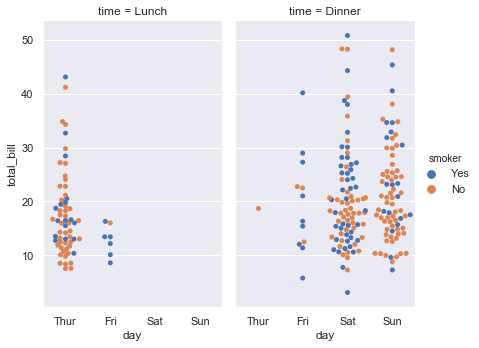

In [187]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

> Unlike with numerical data, it is not always obvious how to order the levels of the categorical variable along its axis. In general, the seaborn categorical plotting functions try to infer the order of categories from the data. If your data have a pandas Categorical datatype, then the default order of the categories can be set there. If the variable passed to the categorical axis looks numerical, the levels will be sorted. But the data are still treated as categorical and drawn at ordinal positions on the categorical axes (specifically, at 0, 1, …) even when numbers are used to label them:

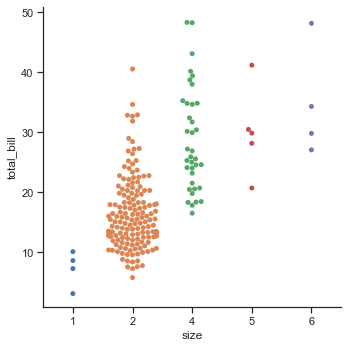

In [54]:
sns.catplot(x= 'size', y= 'total_bill', kind= 'swarm', data= tips.query("size != 3"))

> The other option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the order parameter.

> 1. without order

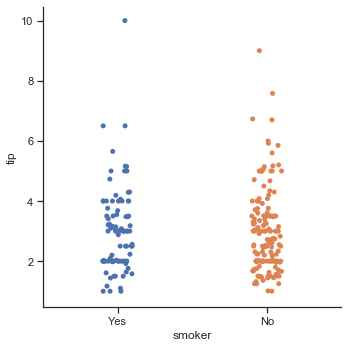

In [55]:
sns.catplot( x= 'smoker', y= 'tip', data= tips)

> 2. with order

In [56]:
sns.catplot( x= 'smoker', y= 'tip', order= ['No', 'Yes'] , data= tips)

> We’ve referred to the idea of “categorical axis”. In these examples, that’s always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories).

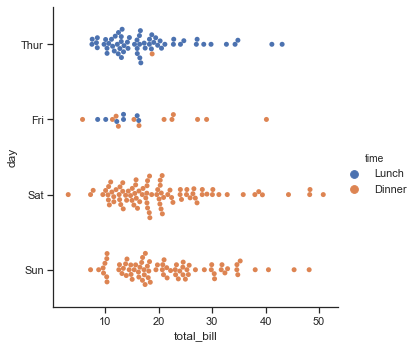

In [57]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

### Distributions of Observations within Categories
As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

#### Boxplots
This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

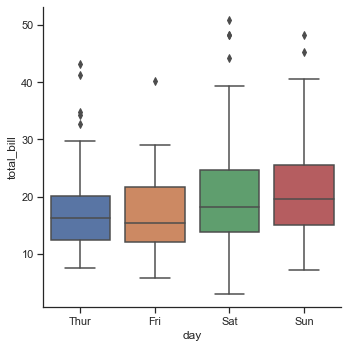

In [58]:
sns.catplot(x= 'day', y= 'total_bill', kind= 'box', data= tips)

> When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap:

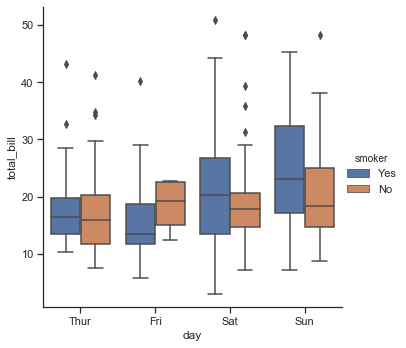

In [59]:
sns.catplot(x= 'day', y= 'total_bill', kind= 'box', data= tips, hue= 'smoker')

> This behavior is called “dodging” and is turned on by default because it is assumed that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging:



In [60]:
sns.catplot(x= 'day', y= 'total_bill', kind= 'box', data= tips, hue= 'smoker', dodge= False)

In [191]:
titanic.head() # we can also use facet here

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [190]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

> A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

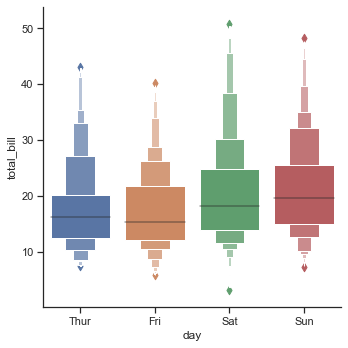

In [62]:
sns.catplot(x= 'day', y= 'total_bill', kind= 'boxen', data= tips)

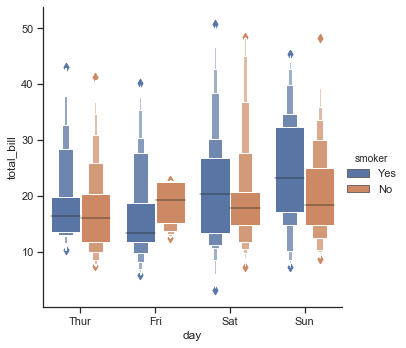

In [63]:
sns.catplot(x= 'day', y= 'total_bill', kind= 'boxen', data= tips, hue= 'smoker')

In [64]:
sns.catplot(x= 'day', y= 'total_bill', kind= 'boxen', data= tips, hue= 'smoker', dodge= False)

> best suited for large datasets

In [65]:
diamonds= sns.load_dataset('diamonds')
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

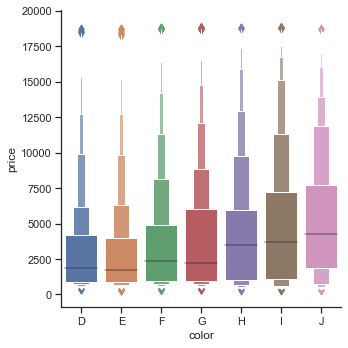

In [66]:
sns.catplot(x= 'color', y= 'price', kind= 'boxen', data= diamonds.sort_values("color"))

#### Violinplots
A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

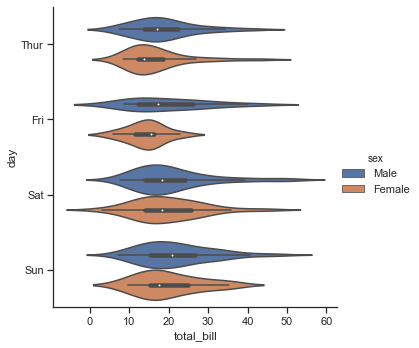

In [67]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips)

> It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

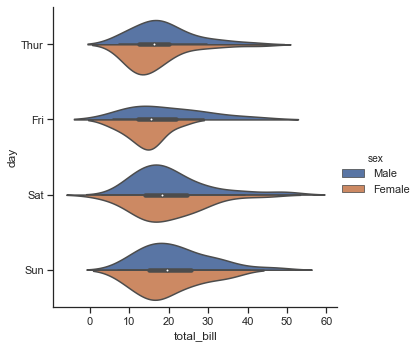

In [68]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips, split= True)

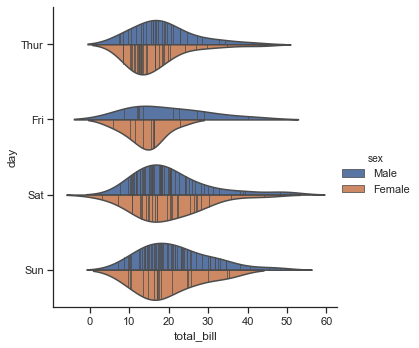

In [69]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips, split= True, inner= "stick")

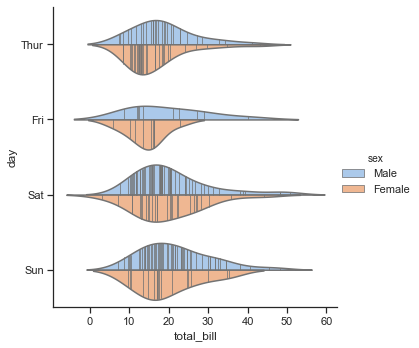

In [70]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips, split= True, inner= "stick", palette= 'pastel')

> It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

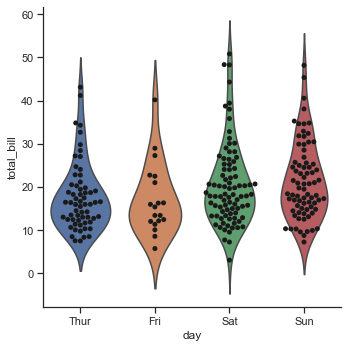

In [71]:
g= sns.catplot( x= 'day', y= 'total_bill', kind= 'violin', inner= None, data= tips)
sns.swarmplot(x= 'day', y= 'total_bill', color= 'k', data= tips, ax= g.ax)

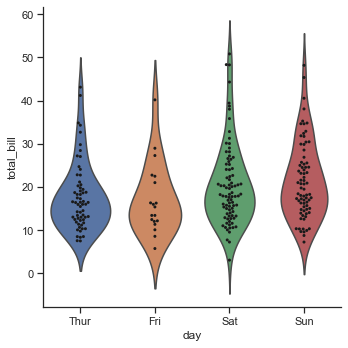

In [72]:
g= sns.catplot( x= 'day', y= 'total_bill', kind= 'violin', inner= None, data= tips)
sns.swarmplot(x= 'day', y= 'total_bill', size=3, color= 'k', data= tips, ax= g.ax)

### Statistical Estimation within Categories

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values.

### Bar plots
A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

In [73]:
titanic= sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

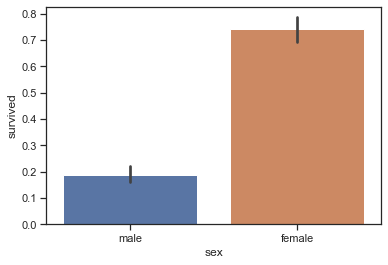

In [74]:
sns.barplot(x= 'sex', y= 'survived', data= titanic)

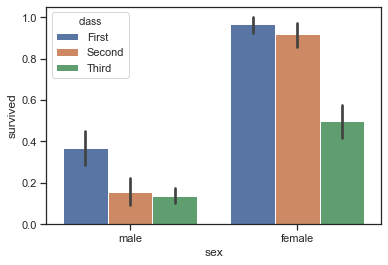

In [75]:
sns.barplot(x= 'sex', y= 'survived',hue= 'class', data= titanic)

> A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

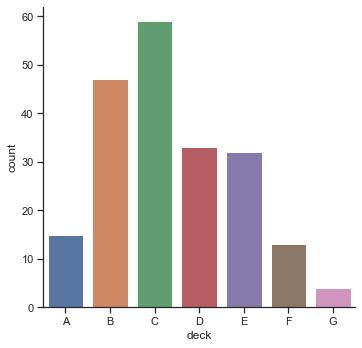

In [76]:
sns.catplot(x= 'deck', kind= 'count', data= titanic)

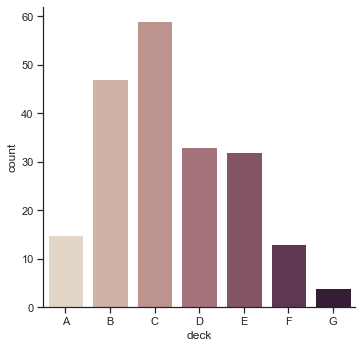

In [77]:
sns.catplot(x= 'deck', kind= 'count', data= titanic, palette= "ch:.25")

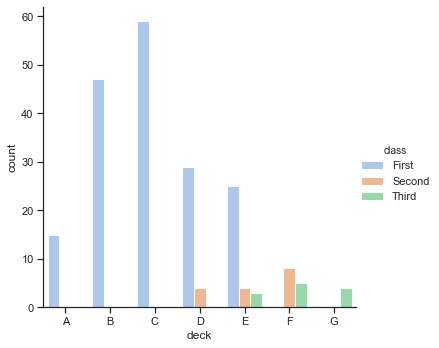

In [78]:
sns.catplot(x= 'deck', kind= 'count', data= titanic, palette= "pastel", hue= 'class')

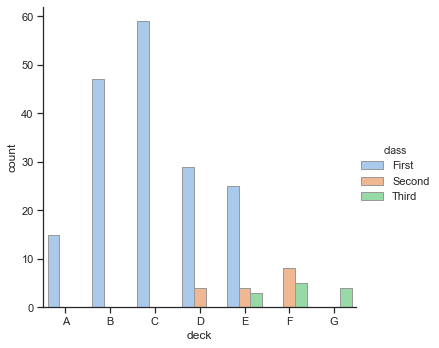

In [79]:
sns.catplot(x= 'deck', kind= 'count', data= titanic, palette= "pastel", hue= 'class', edgecolor= "0.6")

> To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands:

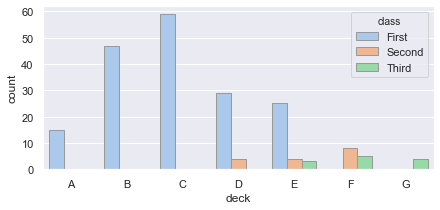

In [184]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(x= 'deck', data= titanic, palette= "pastel", hue= 'class', edgecolor= "0.6")

### Point plots
An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes:



In [80]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

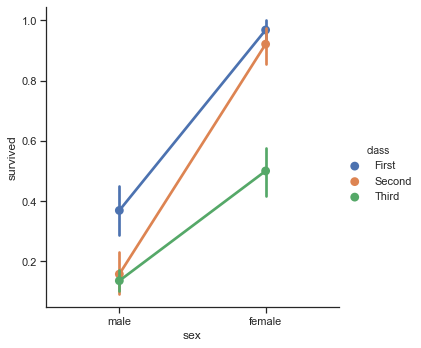

In [81]:
sns.catplot(x= 'sex', y= 'survived', kind= 'point', data= titanic, hue= 'class')

> While the categorical functions lack the style semantic of the relational functions, it can still be a good idea to vary the marker and/or linestyle along with the hue to make figures that are maximally accessible and reproduce well in black and white:

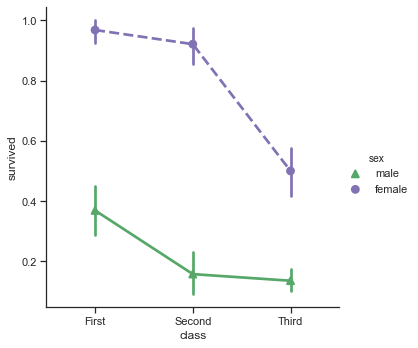

In [82]:
sns.catplot(x= 'class', y= 'survived', hue= 'sex',
           palette= {'male':'g', 'female':'m'},
           markers= ['^','o'], linestyles=['-','--'],
           kind= 'point', data= titanic)

### Plotting “wide-form” data
While using “long-form” or “tidy” data is preferred, these functions can also by applied to “wide-form” data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the data parameter:

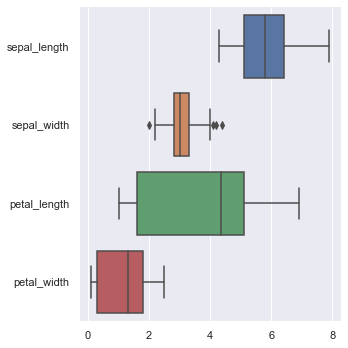

In [179]:
sns.catplot(data= iris, orient= 'h', kind= 'box')

### using axes level functions we can pass pandas dataframe, numpy objects etc.

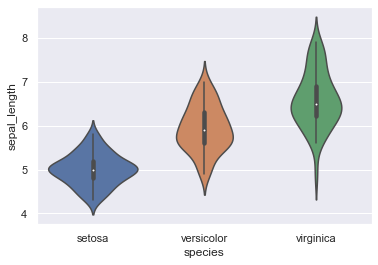

In [180]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

# 3. Visualizing Distribution of the Data:
- distplot()
- kdeplot()
- jointplot()
- rugplot()

## Distplot:

> ## 1. univariate
By default, this will draw a histogram and fit a kernel density estimate (KDE).

In [96]:
sns.set()

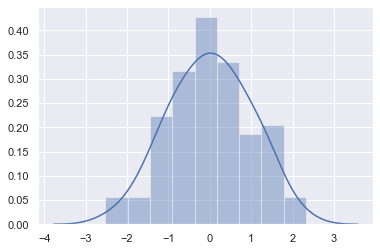

In [192]:
x = np.random.normal(size=100)
sns.distplot(x);

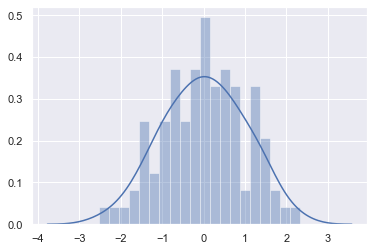

In [194]:
sns.distplot(x, bins= 20);

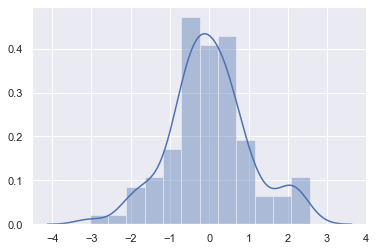

In [195]:
x= np.random.randn(100)
sns.distplot(x, kde= True)

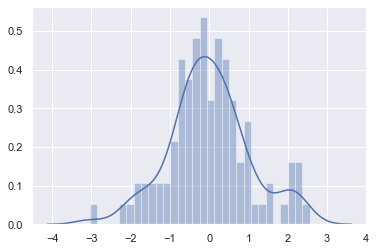

In [197]:
sns.distplot(x, bins= 30)

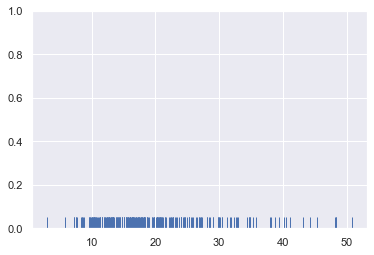

In [174]:
sns.rugplot(x)

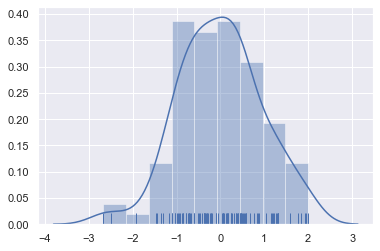

In [99]:
sns.distplot(x, kde= True, rug= True)

### Histogram: 
A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. It is also named as hist in matplotlib.

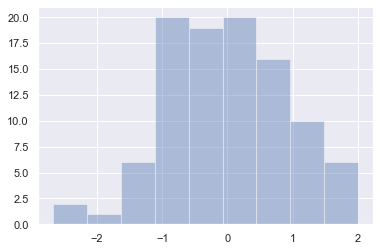

In [100]:
sns.distplot(x, kde= False, rug= False)

### kde(kernal density estimation)
Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis:

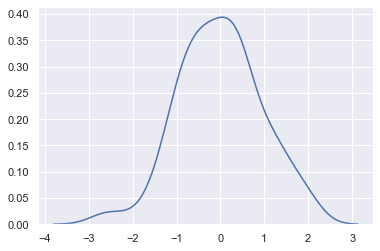

In [103]:
sns.distplot(x, kde= True, hist= False)

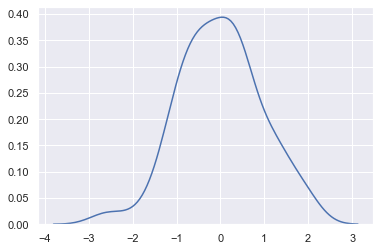

In [104]:
sns.kdeplot(x)

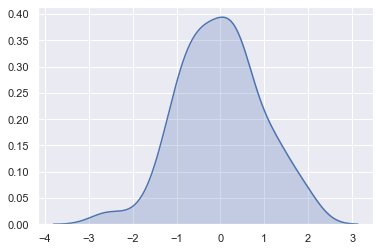

In [105]:
sns.kdeplot(x, shade= True)

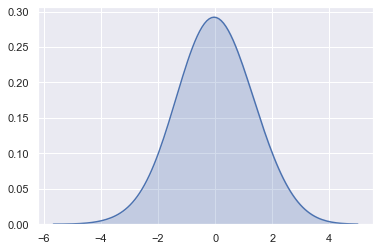

In [106]:
sns.kdeplot(x, shade= True, bw= 1)

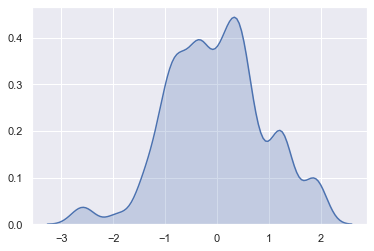

In [107]:
sns.kdeplot(x, shade= True, bw= 0.2)

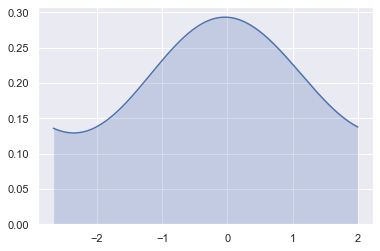

In [108]:
sns.kdeplot(x, shade= True, bw= 1, cut=0)

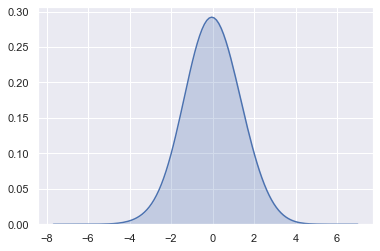

In [114]:
sns.kdeplot(x, shade= True, bw= 1, cut= 5)

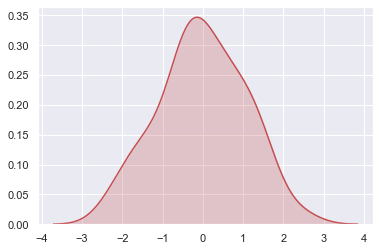

In [200]:
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x, color= 'r', shade= True)

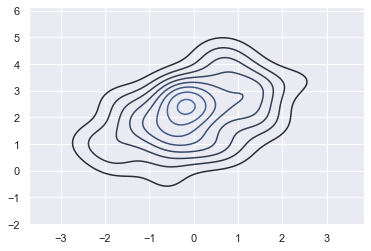

In [204]:
ax = sns.kdeplot(x, y)

In [203]:
ax = sns.kdeplot(x, y, color= 'r', shade= True)

In [205]:
ax = sns.kdeplot(x, y, n_levels=30, cmap="Purples_d")


Plot the density on the vertical axis:

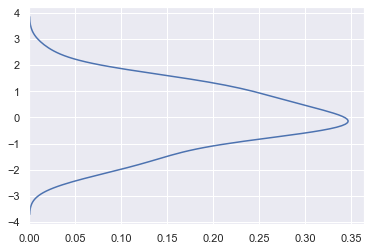

In [206]:
ax = sns.kdeplot(x, vertical=True)

Limit the density curve within the range of the data:

In [207]:
ax = sns.kdeplot(x, cut=0)

Add a colorbar for the contours:

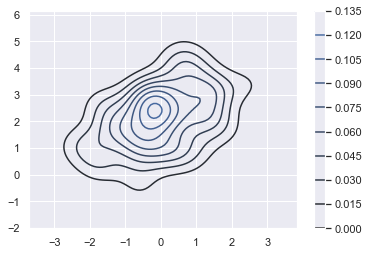

In [208]:
ax = sns.kdeplot(x, y, cbar=True)

> ## 2.Bivariate

In [115]:
tips.head()

total_bill   tip     sex smoker  day    time  size  weekend
0       16.99  1.01  Female     No  Sun  Dinner     2     True
1       10.34  1.66    Male     No  Sun  Dinner     3     True
2       21.01  3.50    Male     No  Sun  Dinner     3     True
3       23.68  3.31    Male     No  Sun  Dinner     2     True
4       24.59  3.61  Female     No  Sun  Dinner     4     True

In [116]:
x= tips['total_bill']
y= tips['tip']

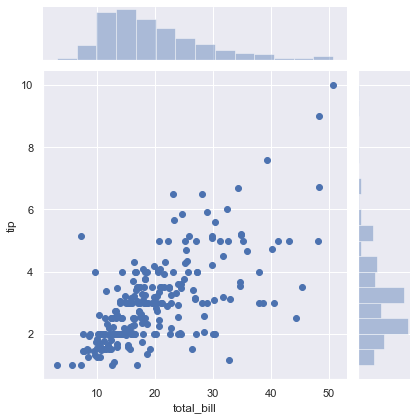

In [117]:
sns.jointplot(x= x, y= y)

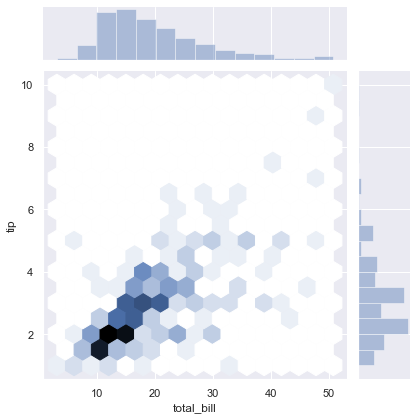

In [118]:
sns.jointplot(x= x, y= y, kind= 'hex')

In [120]:
sns.jointplot(x= x, y= y, kind= 'kde')

This produces a colormap with linearly-decreasing (or increasing)
brightness. That means that information will be preserved if printed to
black and white or viewed by someone who is colorblind.  "cubehelix" is
also available as a matplotlib-based palette, but this function gives the
user more control over the look of the palette and has a different set of
defaults.

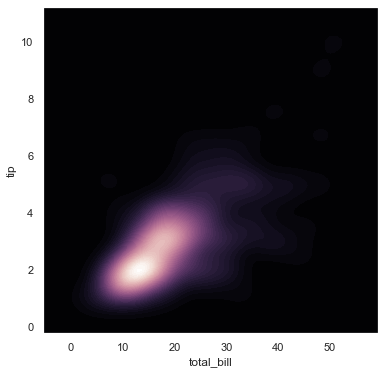

In [139]:
f, ax= plt.subplots(figsize= (6,6))
cmap= sns.cubehelix_palette(light=1, dark= 0, reverse= True, as_cmap= True)
sns.kdeplot(x, y, cmap= cmap, n_levels= 60, shade= True)

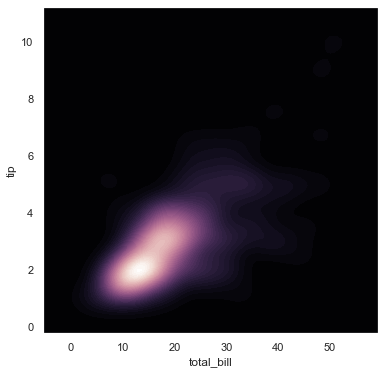

In [138]:
f, ax= plt.subplots(figsize= (6,6))
cmap= sns.cubehelix_palette(n_color,start= 0, rot= 0.4, gamma= 1.0, hue= 0.8,
                   light=1, dark= 0, reverse= True, as_cmap= True)
sns.kdeplot(x, y, cmap= cmap, n_levels= 60, shade= True)

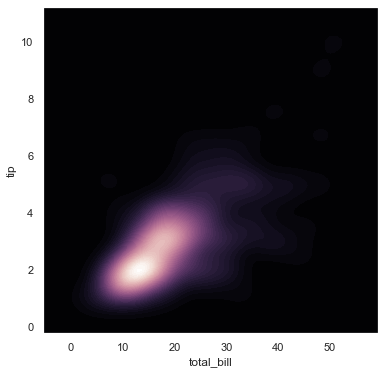

In [143]:
f, ax= plt.subplots(figsize= (6,6))
cmap= sns.cubehelix_palette(start= 0, rot= 0.4, gamma= 1.0, hue= 0.8,
                   light=0, dark= 1, reverse= False, as_cmap= True)
sns.kdeplot(x, y, cmap= cmap, n_levels= 60, shade= True)

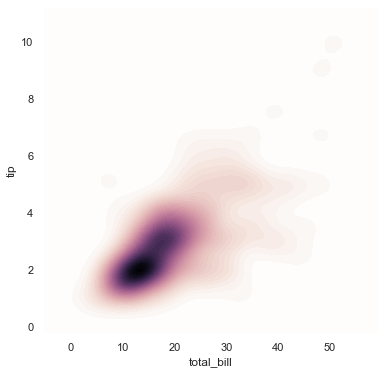

In [146]:
f, ax= plt.subplots(figsize= (6,6))
cmap= sns.cubehelix_palette(start= 0, rot= 0.4, gamma= 1.0, hue= 0.8,
                   light=1, dark= 0, reverse= False, as_cmap= True)
sns.kdeplot(x, y, cmap= cmap, n_levels= 60, shade= True)

Parameters:

n_colors : int
    Number of colors in the palette.
    
start : float, 0 <= start <= 3
    The hue at the start of the helix.
    
rot : float
    Rotations around the hue wheel over the range of the palette.
    
gamma : float 0 <= gamma
    Gamma factor to emphasize darker (gamma < 1) or lighter (gamma > 1)
    colors.
    
hue : float, 0 <= hue <= 1
    Saturation of the colors.
    
dark : float 0 <= dark <= 1
    Intensity of the darkest color in the palette.
    
light : float 0 <= light <= 1
    Intensity of the lightest color in the palette.
    
reverse : bool
    If True, the palette will go from dark to light.
    
as_cmap : bool
    If True, return a matplotlib colormap instead of a list of colors.

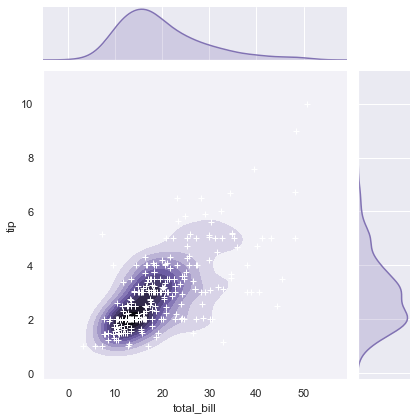

In [149]:
g= sns.jointplot(x= x, y= y, kind= 'kde', color='m')
g.plot_joint(plt.scatter, c= 'w', s= 30, linewidth= 1, marker= '+')
#g.ax_joint.collections[0].set_alpha(0)

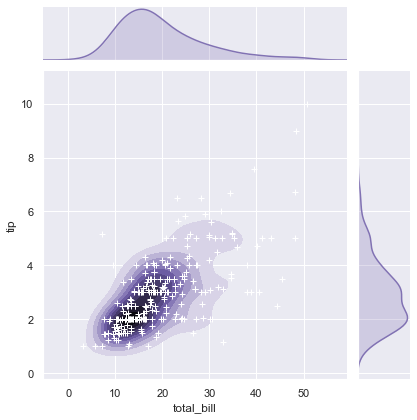

In [167]:
g= sns.jointplot(x= x, y= y, kind= 'kde', color='m')
g.plot_joint(plt.scatter, c= 'w', s= 30, linewidth= 1, marker= '+')
g.ax_joint.collections[0].set_alpha(0)

In [168]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

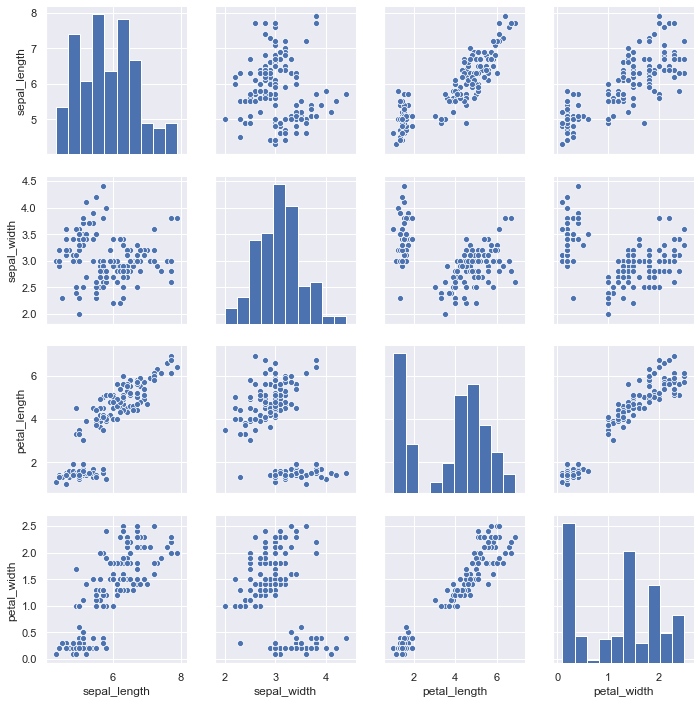

In [169]:
sns.pairplot(iris)

pairplot plot the univariate data plot in diagonal as histplot and bivariate in non-daigonal as scatterplot. although we can change type of the plot, let's see:

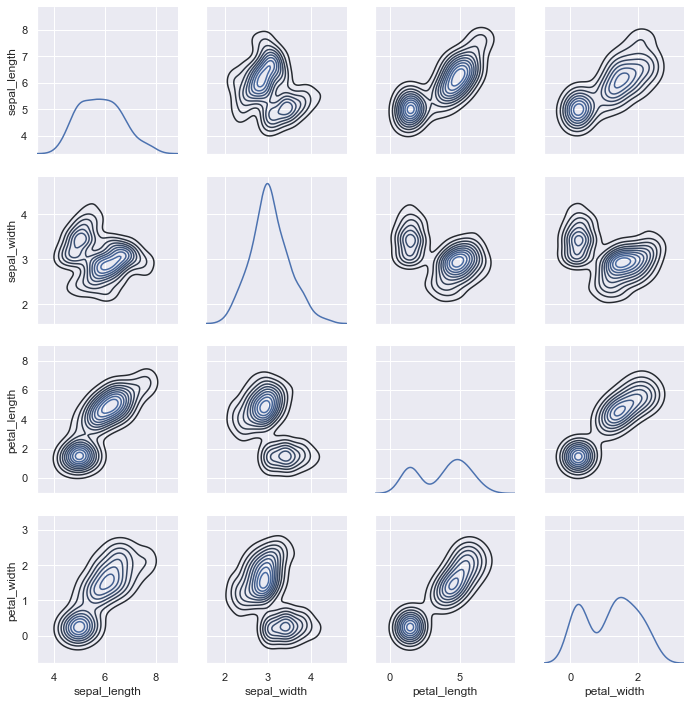

In [172]:
g= sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels= 10)

Plot two shaded bivariate densities:

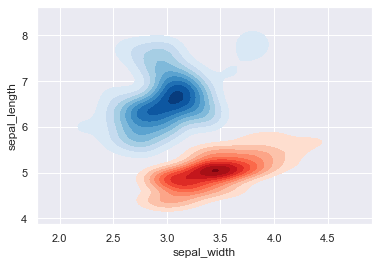

In [209]:
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

In [211]:
from scipy import stats

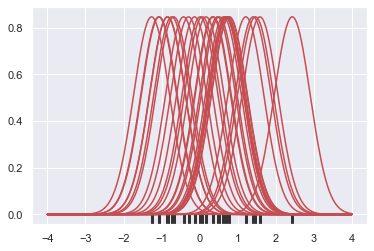

In [212]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

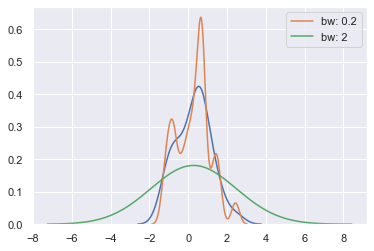

In [213]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

# 4. LinearRegression and Relationship:
- regplot()
- lmplot()

the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. 

In [214]:
sns.set(color_codes=True)

In [215]:
tips = sns.load_dataset("tips")


In [219]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

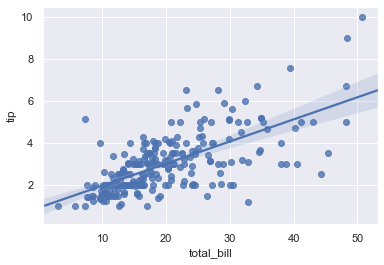

In [216]:
sns.regplot(x="total_bill", y="tip", data=tips);

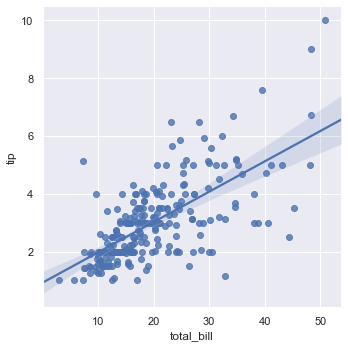

In [217]:
sns.lmplot(x="total_bill", y="tip", data=tips);

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

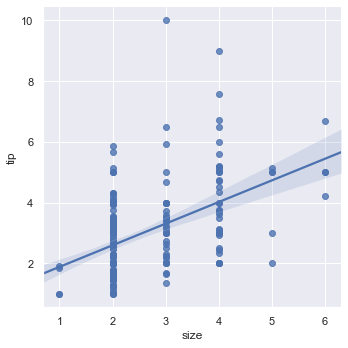

In [218]:
sns.lmplot(x="size", y="tip", data=tips);

One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

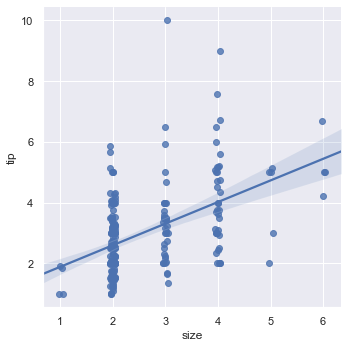

In [220]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

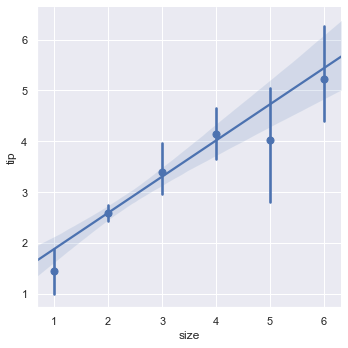

In [221]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### Fitting different kinds of models
The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets.

In [222]:
anscombe = sns.load_dataset("anscombe")

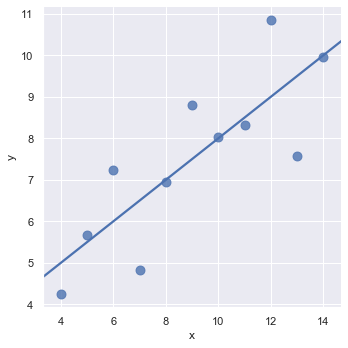

In [223]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

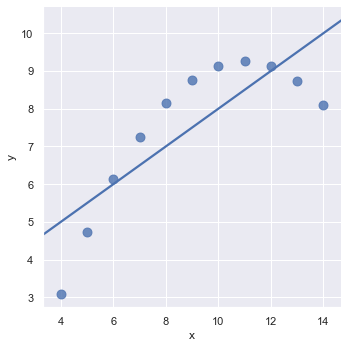

In [224]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

> In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

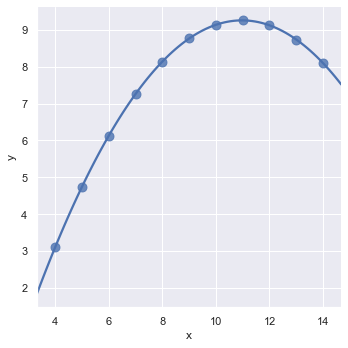

In [225]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

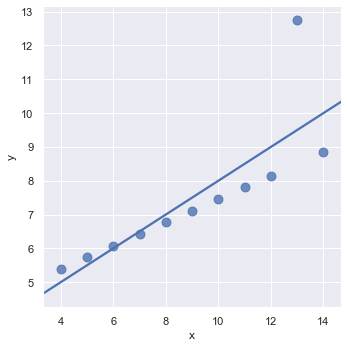

In [226]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

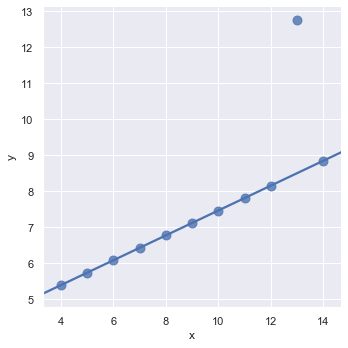

In [227]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

> When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

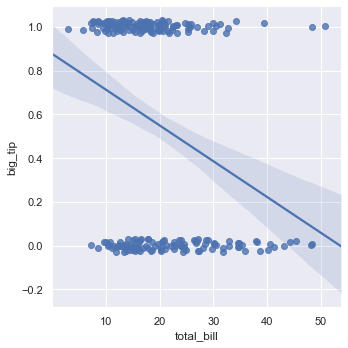

In [229]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);


The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:



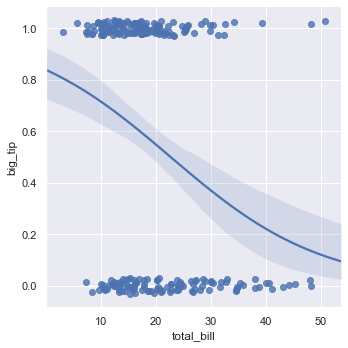

In [231]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

> Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ci=None).

>An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

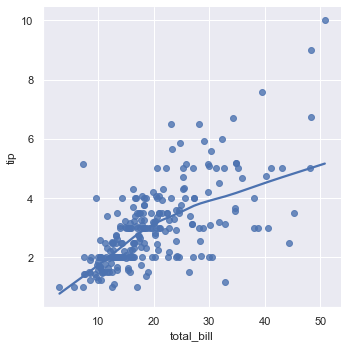

In [232]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

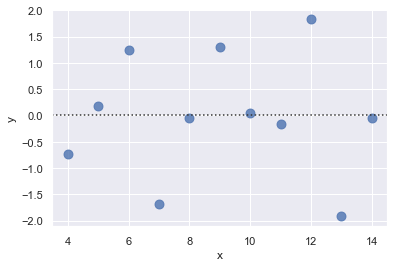

In [233]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

> If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

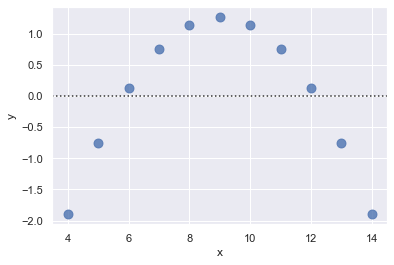

In [234]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

#### regplot() vs lmplot()

 While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

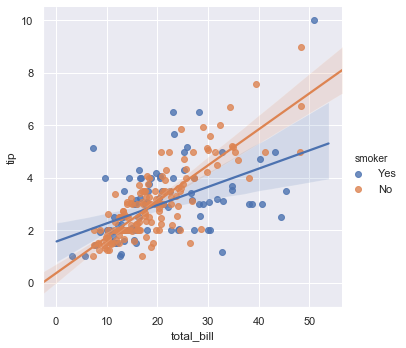

In [235]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);


> In addition to color, it’s possible to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used:

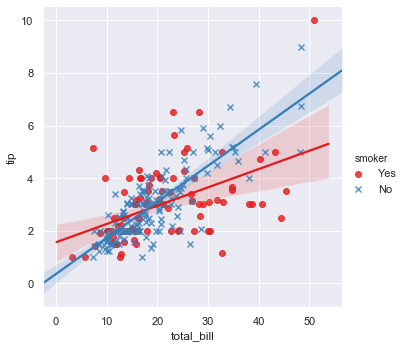

In [236]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

To add another variable, you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid:

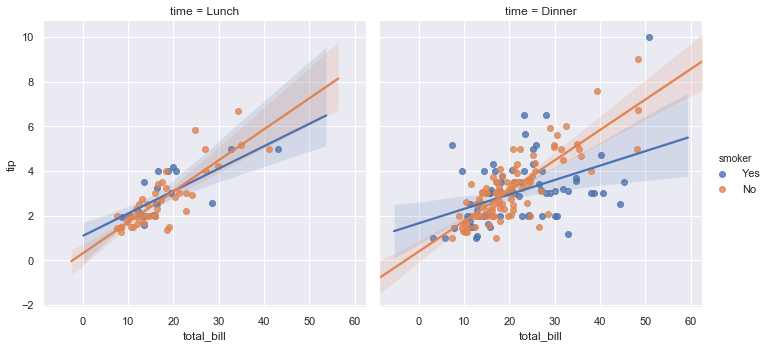

In [237]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

### Controlling the size and shape of the plot

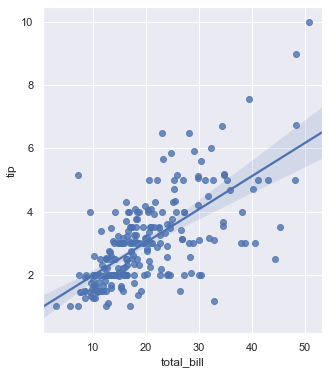

In [238]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

### Plotting a regression in other contexts

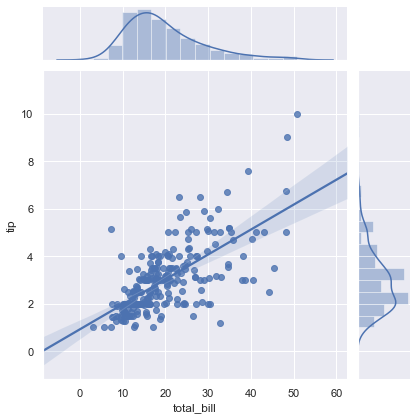

In [239]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

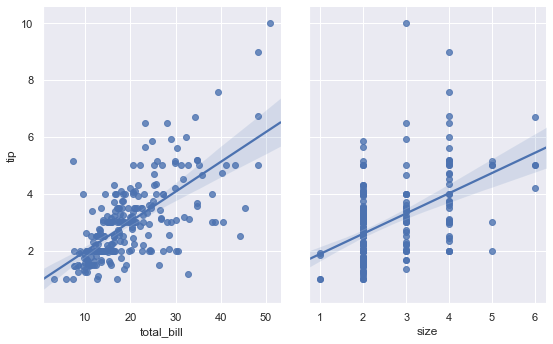

In [240]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg")

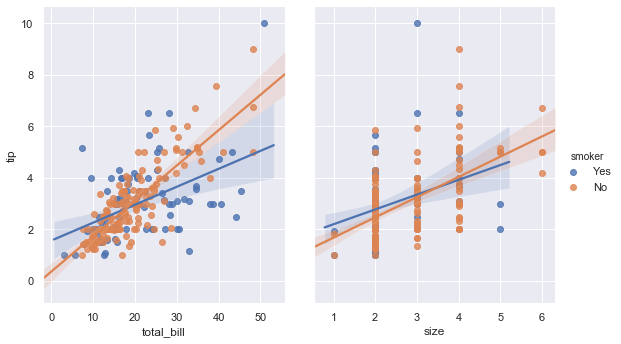

In [241]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");


# 5. Controlling figure Aesthetics:

- figure styling
- axes styling
- color palettes
- etc.

In [243]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

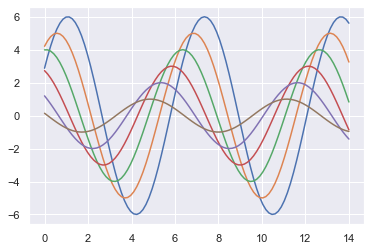

In [244]:
sinplot()

### Seaborn figure styles
- dark
- darkgrid
- white
- whitegrid
- ticks

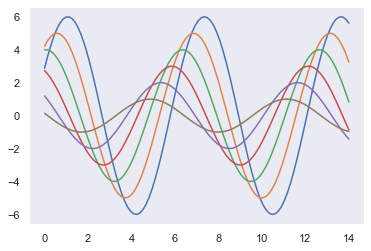

In [249]:
sns.set_style('dark')
sinplot()

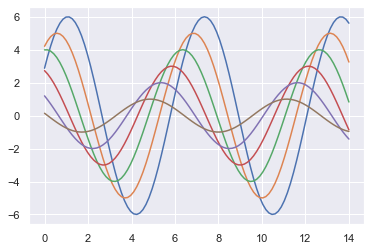

In [247]:
sns.set_style("darkgrid")
sinplot()

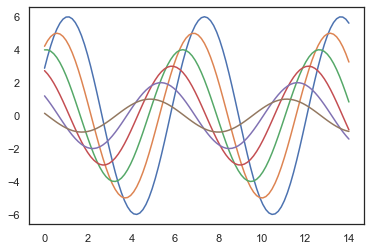

In [250]:
sns.set_style('white')
sinplot()

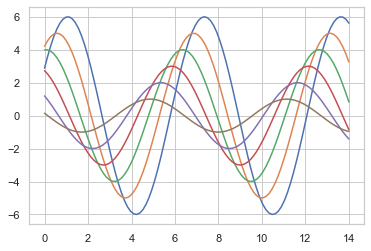

In [248]:
sns.set_style("whitegrid")
sinplot()

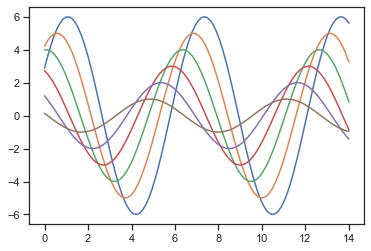

In [251]:
sns.set_style("ticks")
sinplot()

### removing axes spines

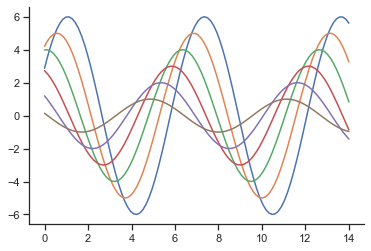

In [252]:
sinplot()
sns.despine()

> Some plots benefit from offsetting the spines away from the data, which can also be done when calling despine(). When the ticks don’t cover the whole range of the axis, the trim parameter will limit the range of the surviving spines.

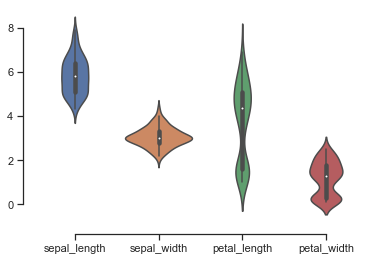

In [254]:
f, ax = plt.subplots()
sns.violinplot(data=iris)
sns.despine(offset=10, trim=True)

You can also control which spines are removed with additional arguments to despine():

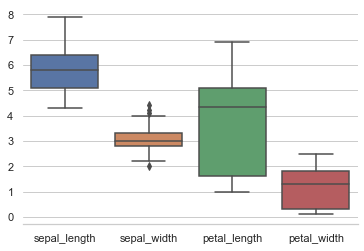

In [255]:
sns.set_style("whitegrid")
sns.boxplot(data=iris, palette="deep")
sns.despine(left=True)

### Temporarily setting figure style
> Although it’s easy to switch back and forth, you can also use the axes_style() function in a with statement to temporarily set plot parameters. This also allows you to make figures with differently-styled axes:

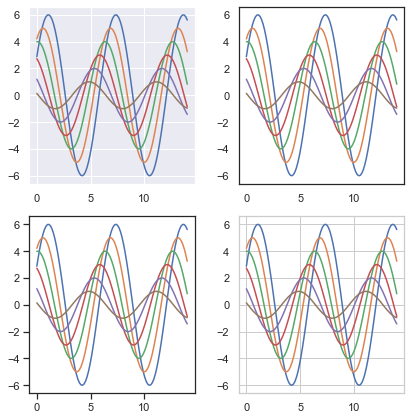

In [256]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot()

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot()

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot()

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()

f.tight_layout()

### Scaling plot elements
A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

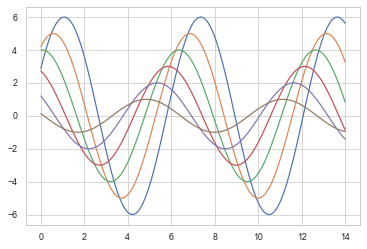

In [257]:
sns.set_context("paper")
sinplot()

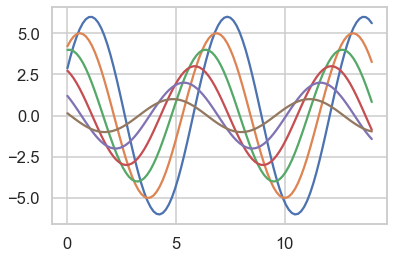

In [258]:
sns.set_context("talk")
sinplot()

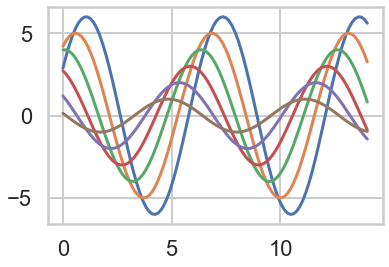

In [259]:
sns.set_context("poster")
sinplot()

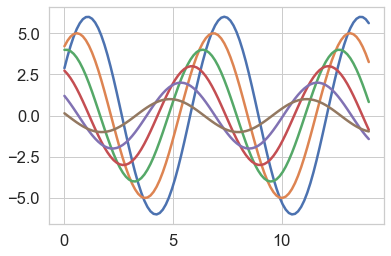

In [260]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

# That's it for now, I hope you learned a lot. If you find this notebook useful then please consider a upvote. Thanks for scrolling so far :)